# KSA308 

## Week 1: Exploring the Southern Ocean with 2D data 

**Objectives:**

Introduce the physical context of the Southern Ocean relevant to understanding its role in the carbon cycle. 

- the cold temperatures and large temperature gradients impacting CO2 solubility; 
- the overturning circulation that connects the deep ocean carbon reservoir to the atmosphere; 
- the seasonal cycle of sea ice production and melt, which contributes to the circulation and impacts air sea gas exchange and biological productivity;  
- nutrient distributions that reflect the combined influence of circulation and biology; 
- biological productivity and HNLC nature of the SO;
- finally an introduction to carbon parameters in the SO. 


**Structure:**

Part 1: The physical ocean (Temp, Sal, density, winds, currents, sea ice)

Part 2: The biological ocean (chl, nutrients)

Part 3: The carbonic ocean (DIC, Alkalinity, pCO2)

Part 4: The connected ocean (explore the interplay of physics, biology and chemistry in a small subregion)

**Recommended literature:**

- Gray, Alison R. “The Four-Dimensional Carbon Cycle of the Southern Ocean.” Annual Review of Marine Science 16, no. 1 (2024): 163–90. https://doi.org/10.1146/annurev-marine-041923-104057. 


In [110]:
# import packages

import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import gsw

# set path to data files on local directory
path_data = '/home/aoetjens/PhD/teaching/KSA308/data/'

# Part 1: The physical ocean


## Data access:

**1. Temperature**

a) Sea Surface Temperature (SST)
Download data from ocean color 
https://oceandata.sci.gsfc.nasa.gov/l3/

 Level 3, Aqua-MODIS whole mission composite, 9km

 File name:
 AQUA_MODIS.20020704_20250831.L3m.CU.SST.x_sst.nc

b) depth resolved Temperature and salinity
Source:
https://data.marine.copernicus.eu/product/MULTIOBS_GLO_PHY_TSUV_3D_MYNRT_015_012/download?dataset=dataset-armor-3d-rep-monthly_202012

Monthly, reanalysis product (this is only december)

File name:
dataset-armor-3d-rep-monthly_1759805143474.nc

**2. Wind and Ekman**


https://data.marine.copernicus.eu/product/MULTIOBS_GLO_PHY_MYNRT_015_003/download?dataset=cmems_obs-mob_glo_phy-cur_my_0.25deg_P1M-m_202411

File name:
cmems_obs-mob_glo_phy-cur_my_0.25deg_P1M-m_1759810620604.nc

monthly data, three years, create climatology, at surface and 15 m

**3. Sea Ice**

https://nsidc.org/data/soac/sea-ice-concentration

monthly climatology
File name:
seaice_conc.nc

## 1.1. Temperature

- why are we interested in  SST/depth-resolved T (focus on biology, temperature dependence on growth, but also fronts,circulation,...)
- how do we measure SST: satellite observations: large scale, upper ~15m, clouds
- depth resolved: ship data (CTD), Argo-floats,...






**Oceanic fronts:**

- Can we identify these fronts in the SST plot?
- what are possible implications for biology/nutrients?
-...


**Thermohaline circulation system:**

- can we identify the vertical structure in the section plots?
- ....


| Front              | Abbreviation | Approx. Latitude (°S) | Boundary Between           | Typical Criterion                   |
| ------------------ | ------------ | --------------------- | -------------------------- | ----------------------------------- |
| Subtropical Front  | STF          | 40–45                 | Subtropical / Subantarctic | SST or salinity gradient            |
| Subantarctic Front | SAF          | 48–52                 | SAZ / PFZ                  | θ ≈ 4 °C drop                       |
| Polar Front        | PF           | 52–58                 | PFZ / AZ                   | θ = 2 °C at surface                 |
| Southern ACC Front | SACCF        | 58–62                 | AZ / SZ                    | Deep temperature/salinity structure |
| Southern Boundary  | SBdy         | 62–65                 | ACC / Continental waters   | θ(2000 m) = 1.8 °C                  |




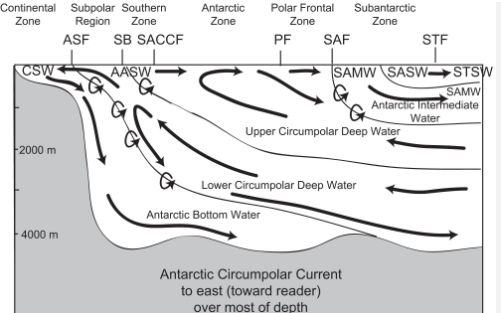

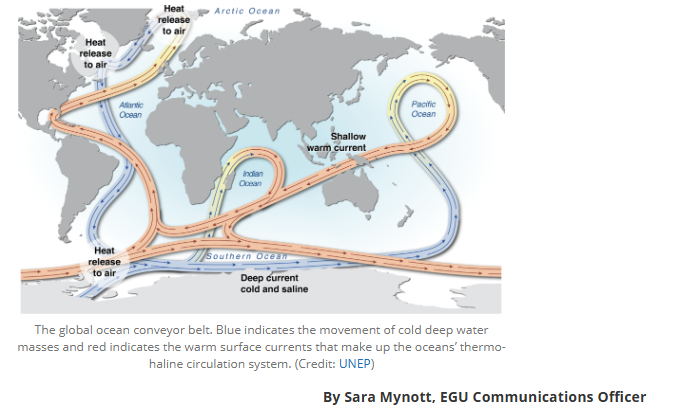

In [3]:
# Sea Surface Temperature (SST)

## data product: OceanColour compilation/monthly climatology
## fronts in the Southern Ocean, (overlay sea surface height contours?)

#read data with xarray

#path_data =  'put in correct file path here'
file = glob.glob(path_data +'*sst.nc')[0]
ds = xr.open_dataset(file, engine='h5netcdf')
print('File dimensions: ', ds.dims)
print('original shape: ', ds.sst.shape)

# downsample data for faster plotting and store sst data as 'sst'
sst = ds.sst.coarsen(lat=20, lon=20, boundary='trim').mean()
print('New shape: ',sst.shape)
ds.close()

File dimensions:  FrozenMappingWarningOnValuesAccess({'lat': 1440, 'lon': 8640, 'rgb': 3, 'eightbitcolor': 256})
original shape:  (1440, 8640)
New shape:  (72, 432)


### Plotting data

In [111]:
# preparing the map

def SouthPolarAxis(ax):
    theta = np.linspace(0, 2*np.pi, 100)
    map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])
    extent = [-180, 180, -90, -40]
    ax.set_extent(extent, ccrs.PlateCarree())
    ax.set_facecolor([0.95, 0.95, 0.95])
    ax.set_boundary(map_circle, transform=ax.transAxes)
    # add coastlines 
    ax.coastlines(resolution = "50m",zorder = 11, linewidth = 1, color='dimgrey')
    ax.add_feature(cft.LAND, color='silver', lw=0.3, zorder=10) #cfeature.COLORS['land_alt1']
    # add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='black', alpha=1, zorder=10)
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}

    return ax, gl

<>:13: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
<>:13: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
/tmp/ipykernel_1210/3090835232.py:13: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
  plt.colorbar(sst_plot,fraction = 0.03, pad = 0.05, orientation='vertical').set_label(label ='SST [$^{\circ}$C]',size=12)
findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


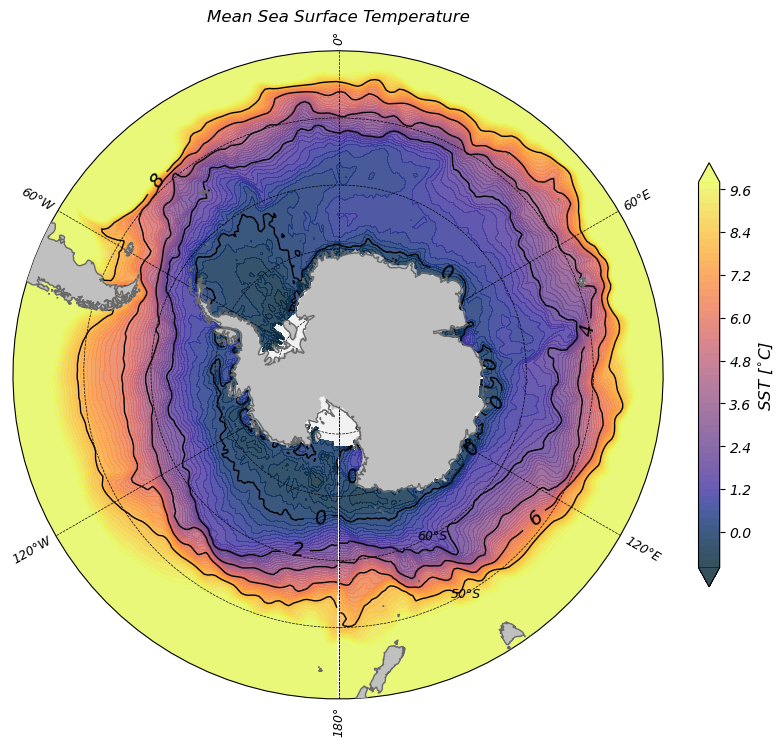

In [4]:
# initialize figure and axis
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax, gl = SouthPolarAxis(ax)

# plot sea surface temperature (SST)
levs =np.arange(-1,10,0.2)
sst_plot = ax.contourf(sst.lon.data, sst.lat.data, sst.data, levs, transform=ccrs.PlateCarree(), extend='both', cmap = 'cmo.thermal',alpha = 0.8)
# add contour lines to identify fronts
sst_con = ax.contour(sst.lon.data, sst.lat.data, sst.data,[0,2,4,6,8], colors = ['black'],linestyles=['-'],linewidths=[1], transform=ccrs.PlateCarree(), alpha=1)
ax.clabel(sst_con, fmt='%2.0f', colors = 'black', fontsize=14)

plt.colorbar(sst_plot,fraction = 0.03, pad = 0.05, orientation='vertical').set_label(label ='SST [$^{\circ}$C]',size=12)
plt.title('Mean Sea Surface Temperature', size=12)
plt.tight_layout()
plt.show()

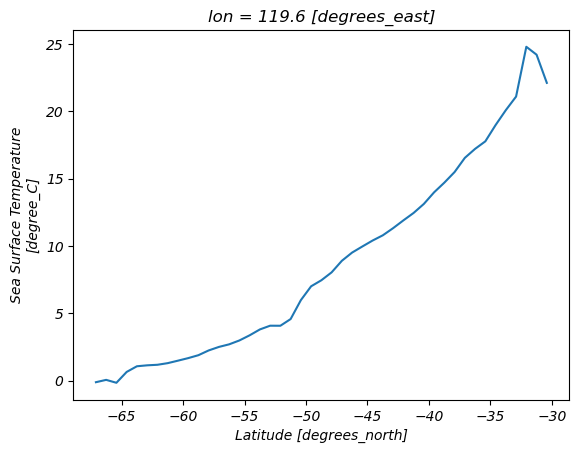

In [5]:
# plot some zonal sections of SST:
# (this is a very quick and easy method to explot xarray's sel method)


sst.sel(lon=120, method='nearest').plot()
#sst.sel(lon=0, method='nearest').plot()
#sst.sel(lon=-60, method='nearest').plot()

In [6]:
# Depth resolved Temperature

#path_data =  'put in correct file path here'
file = glob.glob(path_data +'dataset-armor-3d-*.nc')[0]
ds = xr.open_dataset(file,engine='h5netcdf')
print('original shape: ', ds.dims)

# look at the data file structure

# print(ds)

# extract temperature data
temp = ds.to
# extract salinity data
psal = ds.so
print(temp)
print(psal)
# close data file
ds.close()


original shape:  FrozenMappingWarningOnValuesAccess({'time': 1, 'depth': 50, 'latitude': 209, 'longitude': 1440})
<xarray.DataArray 'to' (time: 1, depth: 50, latitude: 209, longitude: 1440)> Size: 60MB
[15048000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 8B 2022-12-01
  * depth      (depth) float32 200B -0.0 5.0 10.0 15.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude   (latitude) float32 836B -82.12 -81.88 -81.62 ... -30.38 -30.12
  * longitude  (longitude) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
Attributes:
    units:          degrees_C
    standard_name:  sea_water_temperature
    long_name:      Temperature
    unit_long:      degree Celsius
<xarray.DataArray 'so' (time: 1, depth: 50, latitude: 209, longitude: 1440)> Size: 60MB
[15048000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 8B 2022-12-01
  * depth      (depth) float32 200B -0.0 5.0 10.0 15.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude   (latitude) float32 836B -8

/tmp/ipykernel_1210/1321663039.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


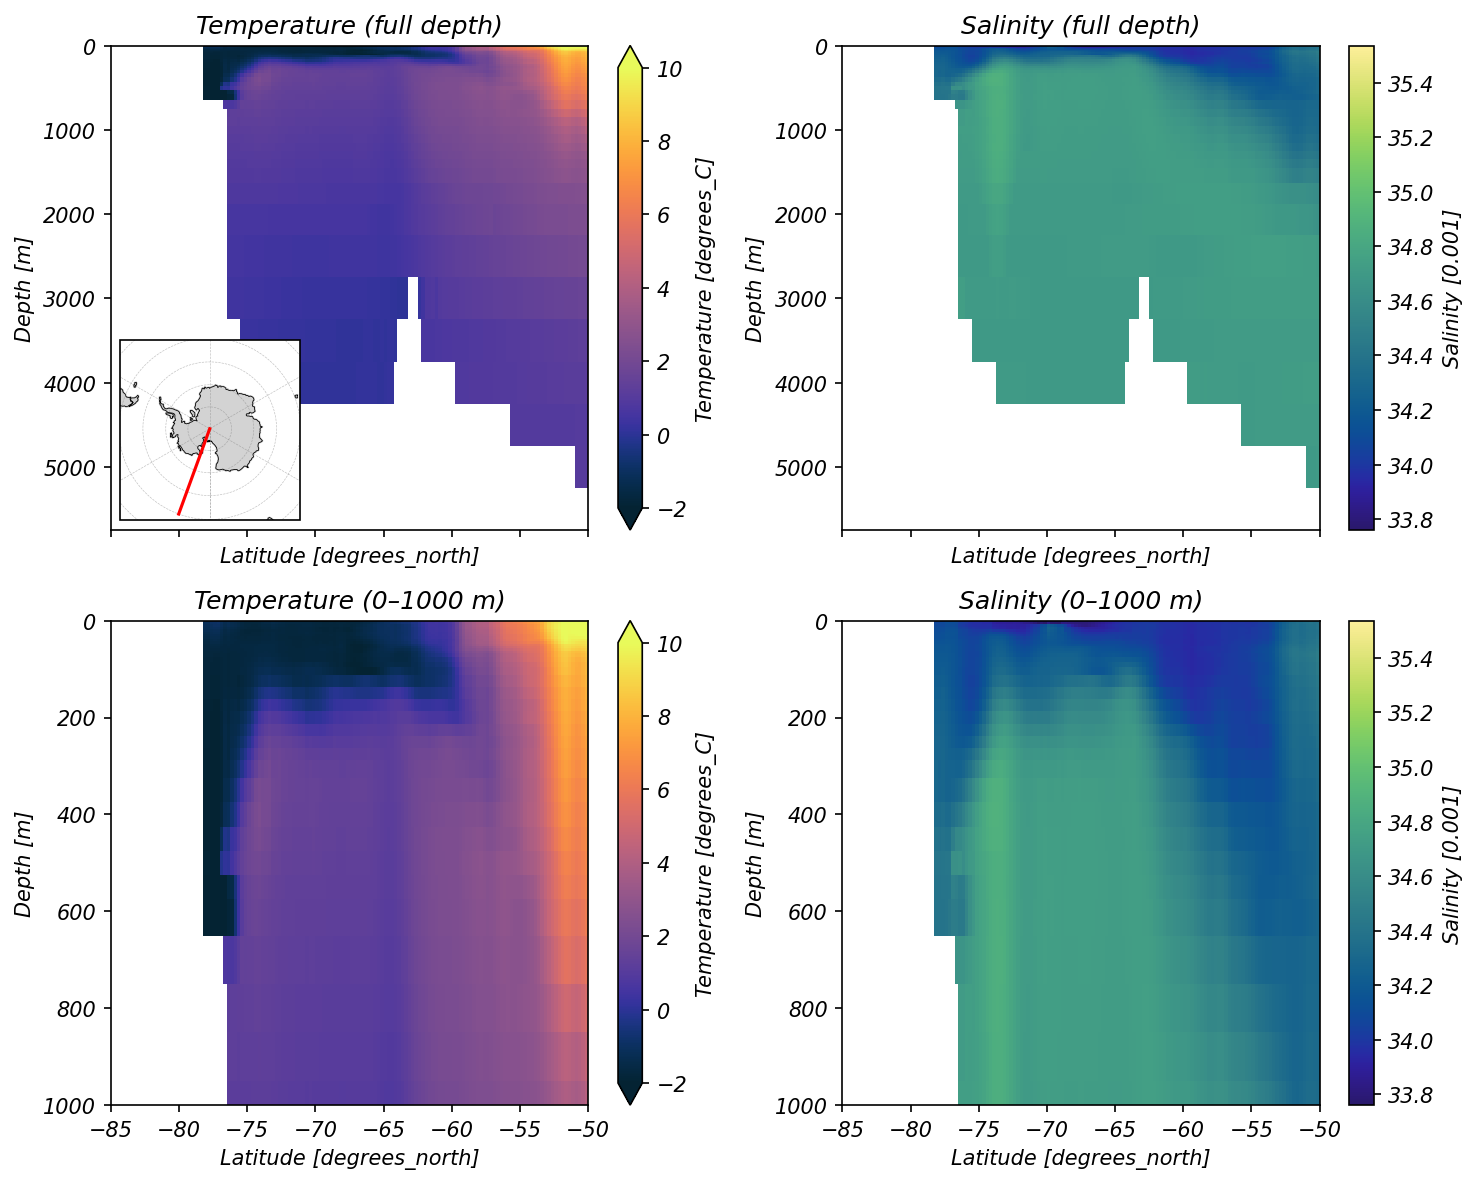

In [7]:
# Create the 2×2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150, sharex=True)

#  1. Full-depth Temperature 
sec_lon = -160
temp.sel(longitude=sec_lon, method='nearest').plot(
    ax=axs[0, 0],
    y='depth', yincrease=False,
    cmap='cmo.thermal', vmin=-2, vmax=10,
    xlim=(-85, -50)
)
axs[0, 0].set_title('Temperature (full depth)')

# Add a little inset map showing the section location

proj = ccrs.SouthPolarStereo()
inset_ax = fig.add_axes([0.07, 0.56, 0.15, 0.15], projection=proj)
# add_axes(rect, projection=None, polar=False, **kwargs)
# with rect = [left, bottom, width, height] in figure coordinates
inset_ax.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())

inset_ax.add_feature(cft.LAND, color='lightgray', zorder=0)
inset_ax.add_feature(cft.COASTLINE, linewidth=0.4, zorder=1)
inset_ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='gray', alpha=0.5, linestyle='--')

# add longitude section line
inset_ax.plot([sec_lon, sec_lon], [-90, -50], color='red', linewidth=1.5,
              transform=ccrs.PlateCarree(), zorder=2)


# 2. Full-depth Salinity 
psal.sel(longitude=sec_lon, method='nearest').plot(
    ax=axs[0, 1],
    y='depth', yincrease=False,
    cmap='cmo.haline',
    xlim=(-85, -50)
)
axs[0, 1].set_title('Salinity (full depth)')

# 3. Upper 1000 m Temperature 
temp.sel(longitude=sec_lon, method='nearest').plot(
    ax=axs[1, 0],
    y='depth', yincrease=False,
    cmap='cmo.thermal', vmin=-2, vmax=10,
    xlim=(-85, -50), ylim=(1000, 0)
)
axs[1, 0].set_title('Temperature (0–1000 m)')

# 4. Upper 1000 m Salinity
psal.sel(longitude=sec_lon, method='nearest').plot(
    ax=axs[1, 1],
    y='depth', yincrease=False,
    cmap='cmo.haline',
    xlim=(-85, -50), ylim=(1000, 0)
)
axs[1, 1].set_title('Salinity (0–1000 m)')

plt.tight_layout()
plt.show()


## 1.2 Wind and currents

- role of winds in currents and circulation
- how do we measure winds
- Ekman upwelling






**Surface currents:**

- What do you notice about the winds? 
- What is the name given to winds that blow in this direction? 

**Ekman upwelling:**

- Where is there upwelling in the Southern Ocean? 
- Can you explain how the upwelling relates to the wind?


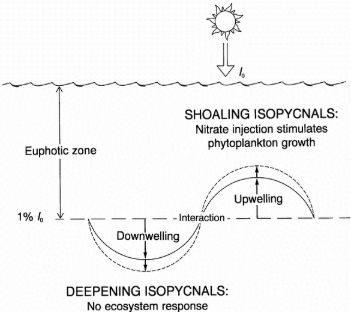


In [112]:
# read in data

file = glob.glob(path_data +'*cmems*.nc')[0]
ds = xr.open_dataset(file)

# uncomment to investigate file structure
# print(ds)

# The variables are:
# vo:   'Eastward sea water velocity'
# ve: 'Eastward sea water velocity due to ekman drift'
# vgos: 'Eastward sea water velocity geostrophic'
# uo:    'Northward sea water velocity'
# ue:  'Northward sea water velocity due to ekman drift'
# ugos: 'Northward sea water velocity geostrophic'

# time variable shows us that we have monthly data over three years
print(ds.time)
# we are interested in the 'average', so we are going to create a climatology (= take the mean of all months)

ds_clim = ds.mean(dim='time')
print(ds_clim)
# the time dimension is now removed

# close monthly data file
# #ds.close()

<xarray.DataArray 'time' (time: 38)> Size: 304B
array(['2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-05-01T00:00:00.000000000', '2021-06-01T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-08-01T00:00:00.000000000',
       '2021-09-01T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-05-01T00:00:00.000000000', '2022-06-01T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2022-08-01T00:00:00.000000000',
       '2022-09-01T00:00:00.000000000', '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000',
   

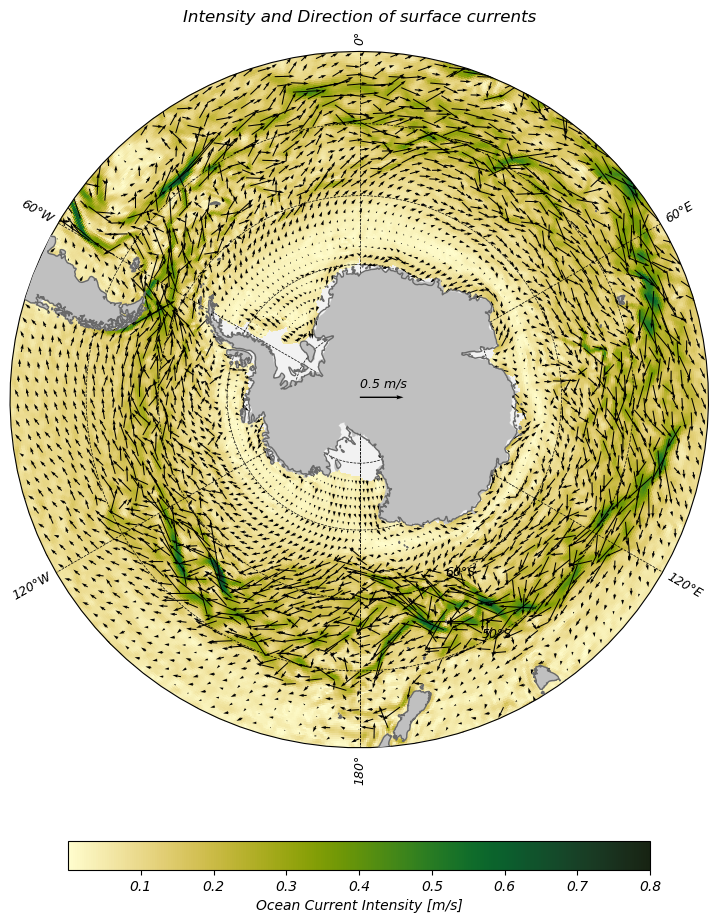

In [92]:
ds_surface = ds_clim.isel(depth=0)  # select surface data (depth = 0 m)
v = ds_surface.vo.values
u = ds_surface.uo.values


# Calculate the intensity of the ocean current vectors
intensity = np.sqrt(u**2 + v**2)

# Create a new figure with Cartopy projection
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax, gl = SouthPolarAxis(ax)
# Convert coordinates to a grid
lon, lat = np.meshgrid(ds_surface.longitude.values, ds_surface.latitude.values)

# Use pcolormesh to display current intensity as a background
im = ax.pcolormesh(lon, lat, intensity, cmap='cmo.speed', transform=ccrs.PlateCarree(), vmax=0.8)


# Define a slice to skip drawing some of the quiver arrows to reduce clutter
skip = (slice(None, None, 5), slice(None, None, 10))

# Use the quiver function to display current vectors with their direction and intensity
# for more information on how to use and adjust a quiver plot: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html
ax.quiver(
    lon[skip], lat[skip],
    u[skip], v[skip],
    transform=ccrs.PlateCarree(),
    color='black', scale=8, width=0.0015, headwidth=3, zorder=3)


# --- Add scale arrow (1 m/s reference) ---
# Choose a position in data coordinates (lon, lat)
arrow_lon, arrow_lat = 0, -90  # top-left corner area
ref_speed = 0.5  # 1 m/s reference
ax.quiver(
    np.array([arrow_lon]), np.array([arrow_lat]),
    np.array([ref_speed]), np.array([0]),
    transform=ccrs.PlateCarree(),
    color='black', scale=8, width=0.002, headwidth=3, zorder=10
)

# add text label next to the arrow
ax.text(
    arrow_lon, arrow_lat+2,
    '0.5 m/s', color='black', fontsize=9,
    transform=ccrs.PlateCarree(),
    ha='left', va='center', zorder=10
)

# Add a color scale for ocean current intensity
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.1,shrink=0.6)
cbar.set_label('Ocean Current Intensity [m/s]')

# Add a title
plt.title('Intensity and Direction of surface currents')
plt.tight_layout()
# Show the map
plt.show()


### Ekman upwelling

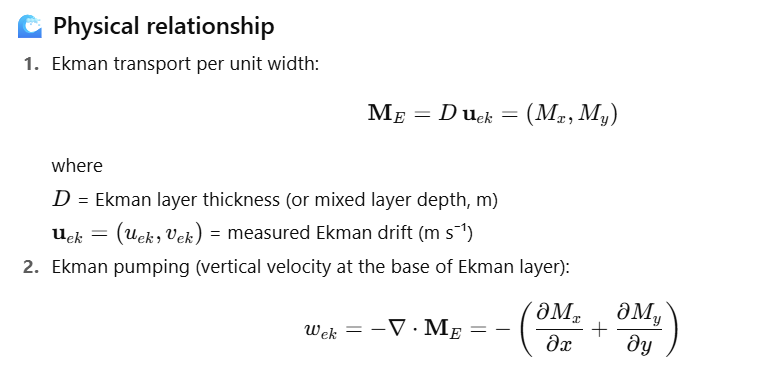


In [178]:

D = 50 # average mixed layer depth in meters

# select Ekman velocities at surface
v_ek = ds_clim.isel(depth=0).ve
u_ek = ds_clim.isel(depth=0).ue 

#  Compute Ekman transport (m²/s) 
Mx = D * v_ek
My = D * u_ek

# Compute transport and spatial metrics
Re = 6371000  # m, earth radius
phi = np.deg2rad(u_ek.latitude)

# Compute grid spacing per point (in radians)
dlon = np.deg2rad(u_ek.longitude.diff('longitude').mean().item())
dlat = np.deg2rad(u_ek.latitude.diff('latitude').mean().item())

# Convert to meters
dx = Re * np.cos(phi) * dlon
dy = Re * dlat

# Central differences (keep same shape via padding)
dMx_dx = (Mx.differentiate('longitude') / dx).pad(longitude=(0,1), constant_values=np.nan)
dMy_dy = (My.differentiate('latitude') / dy).pad(latitude=(0,1), constant_values=np.nan)

# Divergence and Ekman upwelling,  mask antarctic zone < -65 degrees
divM = dMx_dx + dMy_dy
w_ek = (divM).rename('w_ek').where(w_ek.latitude > -65)

# compute annual upwelling in m/year 
w_ek_annual =  w_ek * 60*24*360


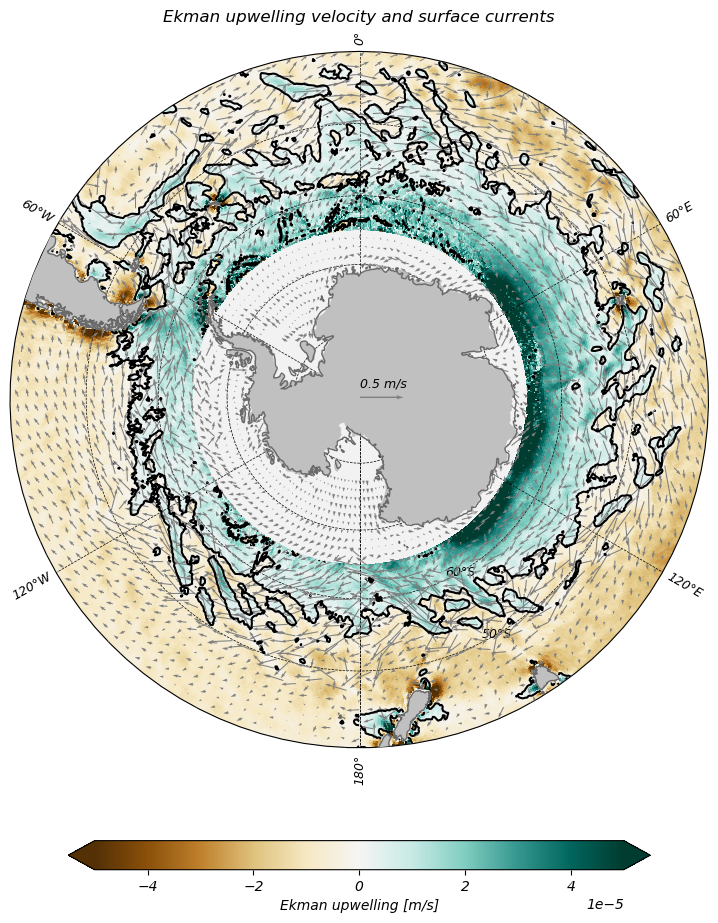

In [183]:
ds_surface = ds_clim.isel(depth=0)  # select surface data (depth = 0 m)
u = ds_surface.uo.values
v = ds_surface.vo.values

# Create a new figure with Cartopy projection
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax, gl = SouthPolarAxis(ax)
# Convert coordinates to a grid
lon, lat = np.meshgrid(ds_surface.longitude.values, ds_surface.latitude.values)

# plot Ekman upwelling in the background
im = ax.pcolormesh(lon, lat, w_ek, cmap='BrBG', transform=ccrs.PlateCarree(), vmin = -5e-5, vmax = 5e-5)
#im = ax.pcolormesh(lon, lat, w_ek_annual, cmap='BrBG', transform=ccrs.PlateCarree(), vmin = -15, vmax= 15)

# Define a slice to skip drawing some of the quiver arrows to reduce clutter
skip = (slice(None, None, 5), slice(None, None, 10))

# Use the quiver function to display current vectors with their direction and intensity
# for more information on how to use and adjust a quiver plot: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html
ax.quiver(
    lon[skip], lat[skip],
    u[skip], v[skip],
    transform=ccrs.PlateCarree(),
    color='grey', scale=8, width=0.0015, headwidth=3, zorder=3)


# --- Add scale arrow (1 m/s reference) ---
# Choose a position in data coordinates (lon, lat)
arrow_lon, arrow_lat = 0, -90  # top-left corner area
ref_speed = 0.5  # 1 m/s reference
ax.quiver(
    np.array([arrow_lon]), np.array([arrow_lat]),
    np.array([ref_speed]), np.array([0]),
    transform=ccrs.PlateCarree(),
    color='grey', scale=8, width=0.002, headwidth=3, zorder=10
)


ax.contour(
    lon, lat, w_ek,
    levels=[0],
    colors='black',
    linewidths=1.5,
    transform=ccrs.PlateCarree(),
    zorder=9
)

# add text label next to the arrow
ax.text(
    arrow_lon, arrow_lat+2,
    '0.5 m/s', color='black', fontsize=9,
    transform=ccrs.PlateCarree(),
    ha='left', va='center', zorder=10
)

# Add a color scale for ocean current intensity
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.1,shrink=0.6, extend='both')
cbar.set_label('Ekman upwelling [m/s]')

# Add a title
plt.title('Ekman upwelling velocity and surface currents')
plt.tight_layout()
# Show the map
plt.show()

## 1.3 Sea ice

- sea ice extent

**Summer/winter:**

- meltwater, stratification, mixing, light penetration,...


**Source of nutrients:**

- what role does sea ice play in the life cycle of phtoplankton (no light, nutrient source, iron)?
- what role does it play in the air-sea gas exchange?


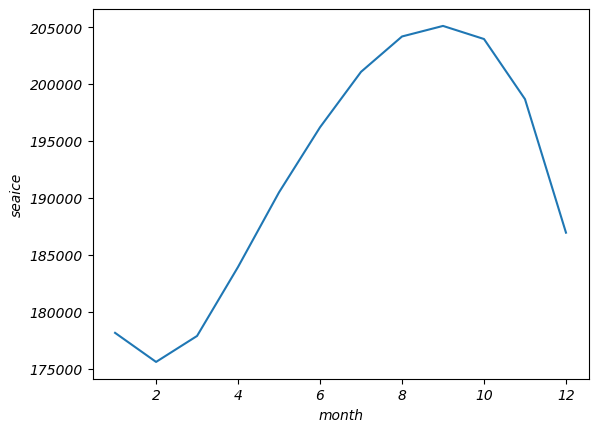

In [63]:
# read in data

file = glob.glob(path_data +'*seaice*.nc')[0]
ds = xr.open_dataset(file)

# uncomment to investigate file structure
# print(ds)

# time variable shows us that we have monthly data 
# we want to look at max and min seaice extent in summer and winter, 
# so we first look at the annual cycle

ds.seaice.sum(['lat','lon']).plot()
seaice_min = ds.seaice.sel(month = 2)
seaice_max = ds.seaice.sel(month = 9)

# close monthly data file
ds.close()


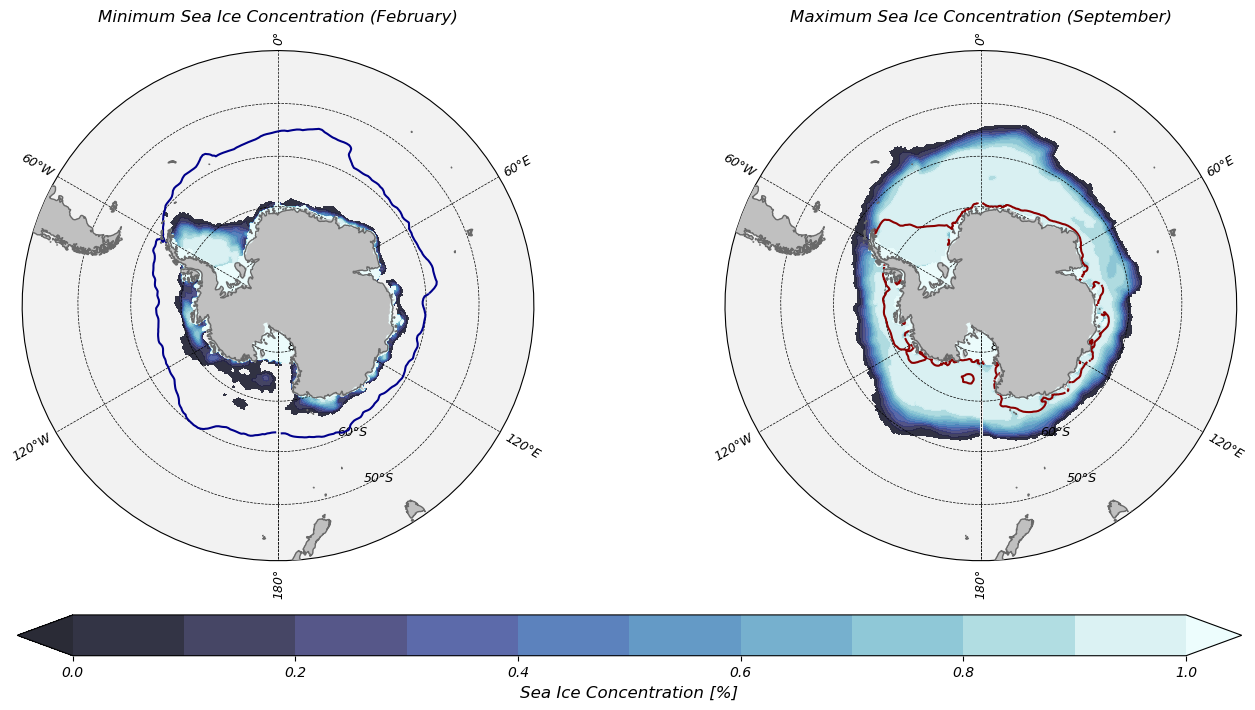

In [64]:


# Create figure and subplots
fig, axs = plt.subplots(
    1, 2, figsize=(14, 7),
    subplot_kw={'projection': ccrs.SouthPolarStereo()}, constrained_layout=True)

# Define contour levels
levs = np.arange(0, 1.05, 0.1)

# Plot data on both subplots
for ax, seaice, title in zip(
    axs,
    [seaice_min, seaice_max],
    ['Minimum Sea Ice Concentration (February)', 'Maximum Sea Ice Concentration (September)']
):
    ax, gl = SouthPolarAxis(ax)

    # Filled contours
    cs = ax.contourf(
        seaice.lon, seaice.lat, seaice,
        levels=levs, transform=ccrs.PlateCarree(),
        cmap='cmo.ice', extend='both', alpha=0.85
    )

    ax.set_title(title, fontsize=12)

# Overlay the outer contours (ice edge ≈ 0.15 concentration) 
edge_level = [0.15]  # typical threshold for sea-ice edge

# Contour of max sea ice onto min map
c1 = axs[0].contour(
    seaice_max.lon, seaice_max.lat, seaice_max,
    levels=edge_level, colors='darkblue', linewidths=1.5,
    transform=ccrs.PlateCarree(), zorder=5
)

# Contour of min sea ice onto max map
c2 = axs[1].contour(
    seaice_min.lon, seaice_min.lat, seaice_min,
    levels=edge_level, colors='darkred', linewidths=1.5,
    transform=ccrs.PlateCarree(), zorder=5
)


# Add one shared horizontal colorbar
cbar = fig.colorbar(
    cs, ax=axs, orientation='horizontal',
    fraction=0.08, pad=0.03, aspect=30
)
cbar.set_label('Sea Ice Concentration [%]', size=12)


plt.show()


# Part 2: The biological ocean


## Data access:

**1. Nutrients**

a) Nitrate, Silicate, Phosphatea

Download data from World Oceaan Atlas (WOA)
https://www.ncei.noaa.gov/access/world-ocean-atlas-2023/

1 degree, annual data

 File names:
 woa23_all_n00_01.nc
 woa23_all_i00_01.nc
 woa23_all_p00_01.nc

b) Surface chlorophyll

Download data from Ocean Color

Mclimatology/or seasonal climatology/ maybe summer and winter

File name:

 

### 2.1 Nitrate, silicate, and phosphate


In [65]:
# read in data
file = glob.glob(path_data +'*bgc*glodap*.nc')[0]
print(file)
ds = xr.open_dataset(file)
print('original shape: ', ds.dims)
#print(ds)
si_avg =  ds.silicate
no3_avg =  ds.NO3
po4_avg = ds.PO4

ds.close()



'''
# could also use the following:
# read in data
# Nitrate
file = glob.glob(path_data +'woa23_all_n00_01.nc')[0]
print(file)
ds = xr.open_dataset(file,engine='scipy', decode_times=False)
print('original shape: ', ds.dims)
no3_avg = ds.isel(time=0).n_an
no3_samples = ds.isel(time=0).sel(depth=0, method='nearest').n_mn
ds.close()


# Phosphate
file = glob.glob(path_data +'woa23_all_p00_01.nc')[0]
print(file)
ds = xr.open_dataset(file,engine='scipy', decode_times=False)
print('original shape: ', ds.dims)
po4_avg = ds.isel(time=0).p_an
po4_samples = ds.isel(time=0).sel(depth=0, method='nearest').p_mn
ds.close()


file = glob.glob(path_data +'woa23_all_i00_01.nc')[0]
print(file)
ds = xr.open_dataset(file,engine='scipy', decode_times=False)
print('original shape: ', ds.dims)
si_avg = ds.isel(time=0).i_an
si_samples = ds.isel(time=0).sel(depth=0, method='nearest').i_mn
ds.close()
'''



/home/aoetjens/PhD/teaching/KSA308/data/cmems_obs-ins_glo_bgc-car_my_glodap-gridded_irr_1760932715733.nc
original shape:  FrozenMappingWarningOnValuesAccess({'depth': 32, 'latitude': 50, 'longitude': 360})


"\n# could also use the following:\n# read in data\n# Nitrate\nfile = glob.glob(path_data +'woa23_all_n00_01.nc')[0]\nprint(file)\nds = xr.open_dataset(file,engine='scipy', decode_times=False)\nprint('original shape: ', ds.dims)\nno3_avg = ds.isel(time=0).n_an\nno3_samples = ds.isel(time=0).sel(depth=0, method='nearest').n_mn\nds.close()\n\n\n# Phosphate\nfile = glob.glob(path_data +'woa23_all_p00_01.nc')[0]\nprint(file)\nds = xr.open_dataset(file,engine='scipy', decode_times=False)\nprint('original shape: ', ds.dims)\npo4_avg = ds.isel(time=0).p_an\npo4_samples = ds.isel(time=0).sel(depth=0, method='nearest').p_mn\nds.close()\n\n\nfile = glob.glob(path_data +'woa23_all_i00_01.nc')[0]\nprint(file)\nds = xr.open_dataset(file,engine='scipy', decode_times=False)\nprint('original shape: ', ds.dims)\nsi_avg = ds.isel(time=0).i_an\nsi_samples = ds.isel(time=0).sel(depth=0, method='nearest').i_mn\nds.close()\n"

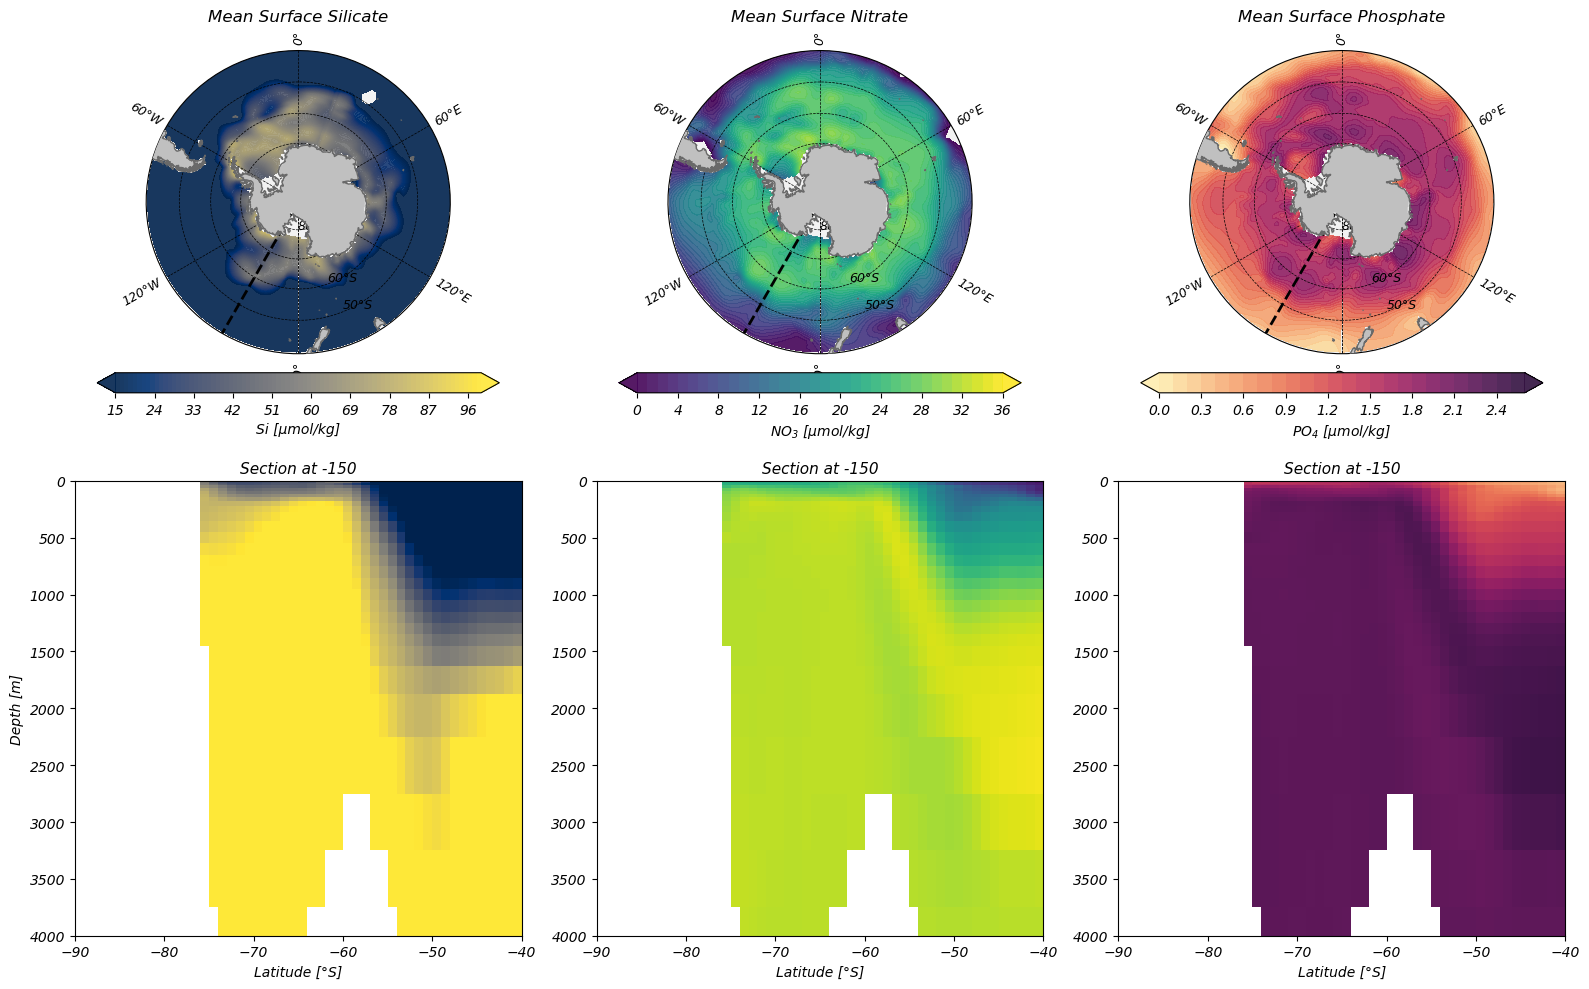

In [66]:

# Define parameters to plot: dataset, label, title, levels, colormap
params = [
    (si_avg, 'Si [µmol/kg]', 'Mean Surface Silicate', np.arange(15, 100, 1), 'cividis'),
    (no3_avg, 'NO$_3$ [µmol/kg]', 'Mean Surface Nitrate', np.arange(0, 37, 1), 'viridis'),
    (po4_avg, 'PO$_4$ [µmol/kg]', 'Mean Surface Phosphate', np.arange(0, 2.7, 0.1), 'cmo.matter')
]

# Longitude for the vertical sections
section_lon = -150

# Create figure with 2 rows and 3 columns
fig, axs = plt.subplots(
    2, 3,
    figsize=(16, 10),
    subplot_kw={'projection': ccrs.SouthPolarStereo()},
    gridspec_kw={'height_ratios': [1, 1.2]})

#  Loop over parameters for the top row (surface maps) 
for i, (ds, label, title, levs, cmap) in enumerate(params):
    ax = axs[0, i]
    ax, gl = SouthPolarAxis(ax)
    param = ds.sel(depth=0, method='nearest')
    
    # Filled contour for surface distribution
    cf = ax.contourf(
        param.longitude, param.latitude, param,
        levels=levs, cmap=cmap, extend='both',
        transform=ccrs.PlateCarree(), alpha=0.9
    )
    # plot line for vertical section
    ax.plot([section_lon, section_lon], [-90, -40], color='black', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
    ax.set_title(title, fontsize=12)
    
    # Add colorbar under each map
    cbar = fig.colorbar(cf, ax=ax, orientation='horizontal', pad=0.05, shrink=0.9)
    cbar.set_label(label, fontsize=10)

# Loop over parameters for the bottom row (vertical sections) 
for i, (ds, label, title, levs, cmap) in enumerate(params):
    ax = axs[1, i]
    # switch from map to regular 2D plot (longitude vs depth)
    axs[1, i].remove()
    ax = fig.add_subplot(2, 3, 3 + i + 1)  # manual placement, normal Axes
    section = ds.sel(longitude=section_lon, method='nearest')
    
    # Vertical section plot
    pcm = ax.pcolormesh(
        section.latitude, section.depth, section,
        cmap=cmap, vmin=levs.min(), vmax=levs.max())
    
    ax.set_ylim(4000, 0)
    ax.set_xlabel('Latitude [°S]')
    ax.set_ylabel('Depth [m]' if i == 0 else '')
    ax.set_title(f'Section at {section_lon}', fontsize=11)

plt.tight_layout()
plt.show()
   

## 2.2 Chlorophyll-a

HNLC concept, iron limitation, summer/winter map

In [67]:
# read in data

# winter data (file is labeled SUMMER for summer in the northern hemisphere)
file = glob.glob(path_data +'*SU*CHL*.nc')[0]
ds = xr.open_dataset(file)
chl_winter = ds.chlor_a.coarsen(lat=20, lon=10, boundary='trim').mean()
ds.close()

# summer data
file = glob.glob(path_data +'*WI*CHL*.nc')[0]
ds = xr.open_dataset(file)
chl_summer = ds.chlor_a.coarsen(lat=20, lon=10, boundary='trim').mean()
ds.close()

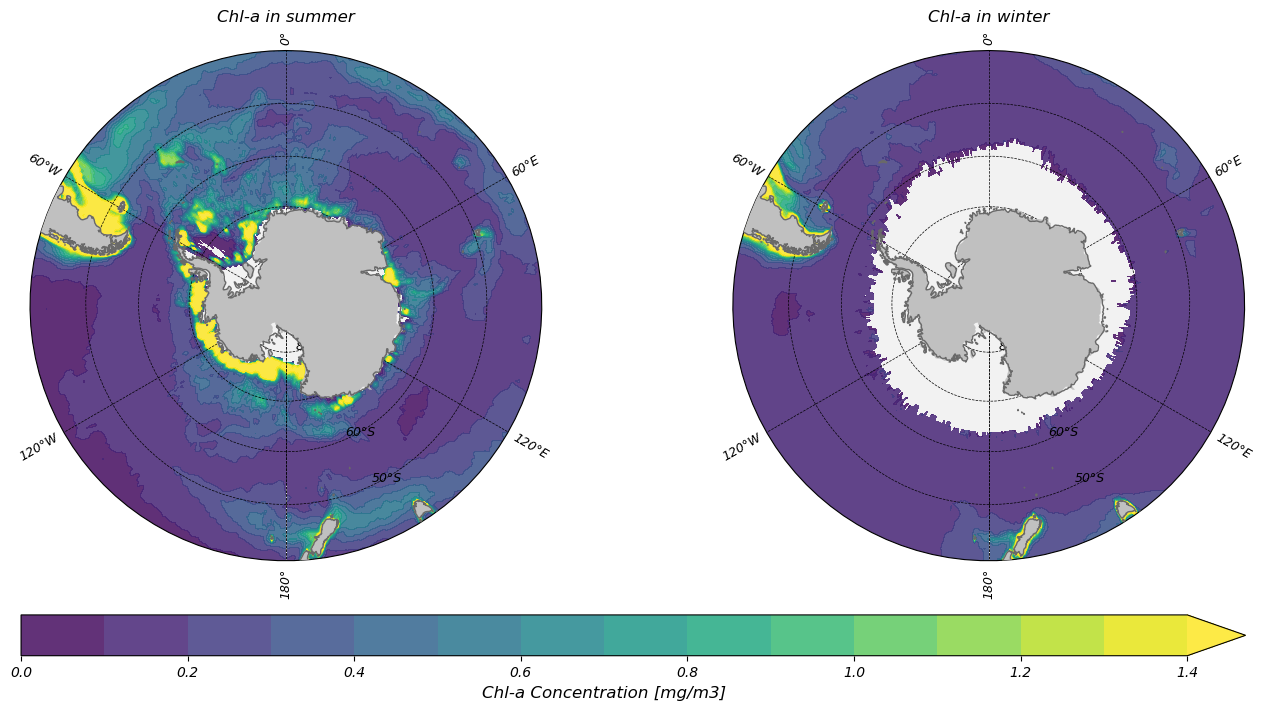

In [68]:
# Create figure and subplots
fig, axs = plt.subplots(
    1, 2, figsize=(14, 7),
    subplot_kw={'projection': ccrs.SouthPolarStereo()}, constrained_layout=True)

# Define contour levels
levs = np.arange(0, 1.5, 0.1)

# Plot data on both subplots
for ax, chl, title in zip(
    axs,
    [chl_summer, chl_winter],
    ['Chl-a in summer', 'Chl-a in winter']
):
    ax, gl = SouthPolarAxis(ax)

    # Filled contours
    cs = ax.contourf(
        chl.lon, chl.lat, chl,
        levels=levs, transform=ccrs.PlateCarree(),
        cmap='viridis', extend='max', alpha=0.85
    )

    ax.set_title(title, fontsize=12)
# Add one shared horizontal colorbar
cbar = fig.colorbar(
    cs, ax=axs, orientation='horizontal',
    fraction=0.08, pad=0.03, aspect=30
)
cbar.set_label('Chl-a Concentration [mg/m3]', size=12)


plt.show()


# Part 3: The carbonic ocean


## Data access:

**1. DIC**

**2. pCO2**

**3. Alkalinity**


File name:
cmems_obs-ins_glo_bgc-car_my_glodap-gridded_irr_1760932715733.nc

In [69]:
# read in data
file = glob.glob(path_data +'*bgc*glodap*.nc')[0]
print(file)
ds = xr.open_dataset(file)
print('original shape: ', ds.dims)
#print(ds)
TAlk_avg =  ds.TAlk
TCO2_avg =  ds.TCO2
oxygen_avg = ds.oxygen

ds.close()


print(TCO2_avg.max())

/home/aoetjens/PhD/teaching/KSA308/data/cmems_obs-ins_glo_bgc-car_my_glodap-gridded_irr_1760932715733.nc
original shape:  FrozenMappingWarningOnValuesAccess({'depth': 32, 'latitude': 50, 'longitude': 360})
<xarray.DataArray 'TCO2' ()> Size: 4B
array(2313.7688, dtype=float32)


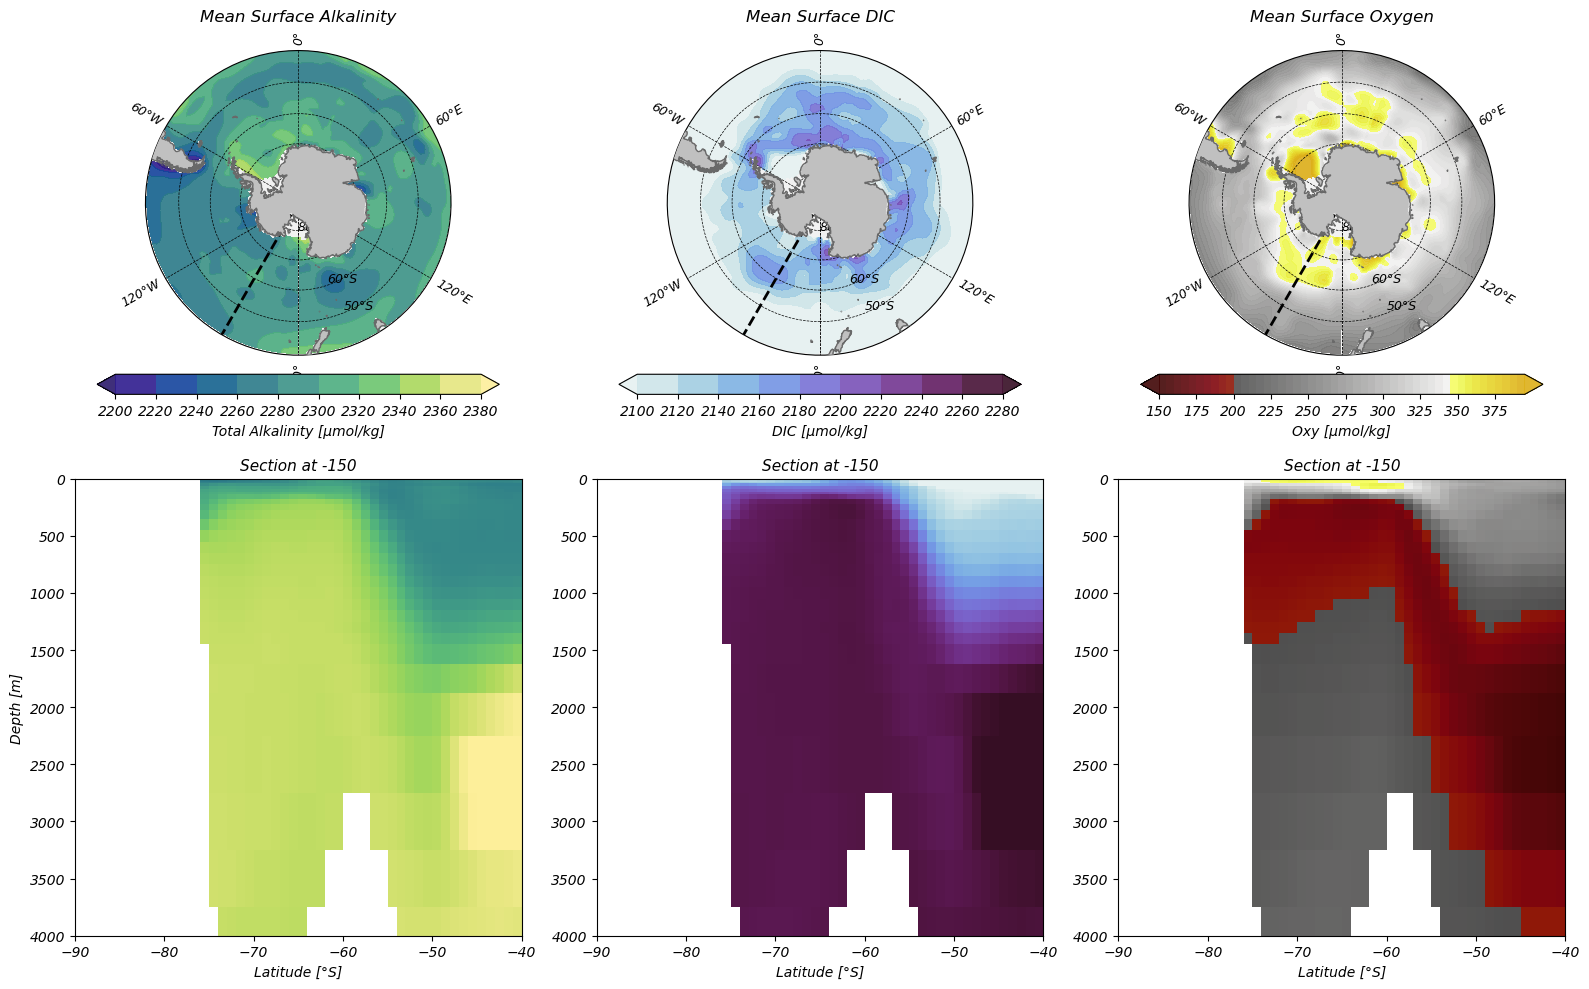

In [70]:
# Define parameters to plot: dataset, label, title, levels, colormap
params = [
    (TAlk_avg, 'Total Alkalinity [µmol/kg]', 'Mean Surface Alkalinity', np.arange(2200, 2400, 20), 'cmo.haline'),
    (TCO2_avg, 'DIC [µmol/kg]', 'Mean Surface DIC', np.arange(2100, 2300, 20), 'cmo.dense'),
    (oxygen_avg, 'Oxy [µmol/kg]', 'Mean Surface Oxygen', np.arange(150, 400, 5), 'cmo.oxy')
]

# Longitude for the vertical sections
section_lon = -150

# Create figure with 2 rows and 3 columns
fig, axs = plt.subplots(
    2, 3,
    figsize=(16, 10),
    subplot_kw={'projection': ccrs.SouthPolarStereo()},
    gridspec_kw={'height_ratios': [1, 1.2]})

#  Loop over parameters for the top row (surface maps) 
for i, (ds, label, title, levs, cmap) in enumerate(params):
    ax = axs[0, i]
    ax, gl = SouthPolarAxis(ax)
    param = ds.sel(depth=0, method='nearest')
    
    # Filled contour for surface distribution
    cf = ax.contourf(
        param.longitude, param.latitude, param,
        levels=levs, cmap=cmap, extend='both',
        transform=ccrs.PlateCarree(), alpha=0.9
    )
    # plot line for vertical section
    ax.plot([section_lon, section_lon], [-90, -40], color='black', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
    ax.set_title(title, fontsize=12)
    
    # Add colorbar under each map
    cbar = fig.colorbar(cf, ax=ax, orientation='horizontal', pad=0.05, shrink=0.9)
    cbar.set_label(label, fontsize=10)

# Loop over parameters for the bottom row (vertical sections) 
for i, (ds, label, title, levs, cmap) in enumerate(params):
    ax = axs[1, i]
    # switch from map to regular 2D plot (longitude vs depth)
    axs[1, i].remove()
    ax = fig.add_subplot(2, 3, 3 + i + 1)  # manual placement, normal Axes
    section = ds.sel(longitude=section_lon, method='nearest')
    
    # Vertical section plot
    pcm = ax.pcolormesh(
        section.latitude, section.depth, section,
        cmap=cmap, vmin=levs.min(), vmax=levs.max())
    
    ax.set_ylim(4000, 0)
    ax.set_xlabel('Latitude [°S]')
    ax.set_ylabel('Depth [m]' if i == 0 else '')
    ax.set_title(f'Section at {section_lon}', fontsize=11)

plt.tight_layout()
plt.show()
   

# Part 4: The connected ocean

**Task:** Choose a region of interest (e.g., Kerguelen Islands [60, 120, -60, -40]) and look at all the different parameters we explored above.

Try to discover how physics, biology and chemistry are closely connected



In [80]:
# set bounding box for region of interest

#Subantarctic near SOTS (47S, 142 E)
region_1 = [135, 150, -50, -45]                              
#PF zone away from island influence
region_2 = [-160, -140, -60, -55]         
#Bloom region downstream from Kerguelen 
region_3 = [67, 85, -52, -45]         
#Antarctic zone
region_4 = [-30, -20, -65, -60]         
#Sub-polar zone with lots of winter sea ice
region_5 = [0, 30, -65, -60]         

<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_244791/4127569874.py:25: SyntaxWarning: invalid escape sequence '\c'
  plt.colorbar(sst_plot,fraction = 0.03, pad = 0.05, orientation='vertical').set_label(label ='SST [$^{\circ}$C]',size=12)


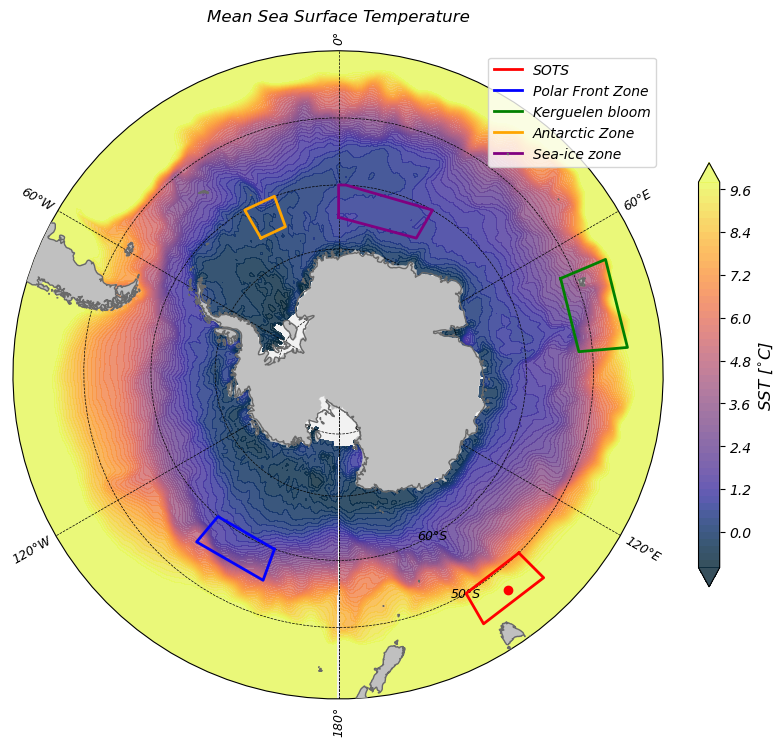

In [ ]:
# overview of the different regions 

# initialize figure and axis
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax, gl = SouthPolarAxis(ax)

# plot sea surface temperature (SST)
levs =np.arange(-1,10,0.2)
sst_plot = ax.contourf(sst.lon.data, sst.lat.data, sst.data, levs, transform=ccrs.PlateCarree(), extend='both', cmap = 'cmo.thermal',alpha = 0.8)

# plot different regions
regions = [region_1, region_2, region_3, region_4, region_5]
colors = ['red', 'blue', 'green', 'orange', 'purple']
labels = ['SOTS', 'Polar Front Zone', 'Kerguelen bloom', 'Antarctic Zone', 'Sea-ice zone']   
for region, color, label in zip(regions, colors, labels):
    lon_min, lon_max, lat_min, lat_max = region
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
            [lat_min, lat_min, lat_max, lat_max, lat_min],
            color=color, linewidth=2, transform=ccrs.PlateCarree(), label=label)

ax.plot(142, -47,'or', transform=ccrs.PlateCarree(), zorder=10) # SOTS location


ax.legend(loc='upper right')

plt.colorbar(sst_plot,fraction = 0.03, pad = 0.05, orientation='vertical').set_label(label ='SST [$^{\circ}$C]',size=12)
plt.title('Mean Sea Surface Temperature', size=12)
plt.tight_layout()
plt.show()

In [96]:
# now compute the average sea-ice, chl-a, sst, nitrate, phosphate, silicate, alkalinity, dic, oxygen in these regions

# when selecting the slice, you might have to adjust 'lon' -> 'longitude' depending on the dataset.
# if the mean is 'nan' double check that the dataset is not empty and also confirm visually by plotting the data.

# SST
region = region_1
sst_region_1 = sst.sel(lon=slice(region[0], region[1]), lat=slice(region[3], region[2]))
sst_mean_1 = sst_region_1.mean().item()
print('Region 1 SST mean: ', sst_mean_1)

# chl-a (instead of mean, could also look at max)
chl_summer_region_1 = chl_summer.sel(lon=slice(region[0], region[1]), lat=slice(region[3], region[2]))
chl_summer_mean_1 = chl_summer_region_1.mean().item()
print('Region 1 CHL-a mean: ', chl_summer_mean_1)



# Continue for the other parameter

# compare to other regions

Region 1 SST mean:  10.15768814086914
Region 1 CHL-a mean:  0.29559651017189026
